## Support Vector Machine in Python

# Inhaltsverzeichnis 

- **Aufgabenbeschreibung**
- **Vorbearbeitung der Daten**
    - **Teil 1: Überblick gewinnen**
- **Visualisierung der Daten**
    - **Teil 2: Verteilung eines Features plotten I**
    - **Teil 3:  Verteilung eines Features plotten II**
    - **Teil 4: Zusätzliche Features plotten**
- **Machine Learning**
    - **Teil 6: Daten extrahieren**
    - **Teil 7:  Häufigkeiten plotten**
    - **Teil 8: Daten splitten**
    - **Teil 9: SVM trainieren**
    - **Teil 10: Genauigkeit des Modells berechnen**
    - **Teil 11: Confusion Matrix**
    - **Teil 12: Confusion Matrix II**


# Aufgabenbeschreibung (Datensatz analysieren)

In diesem Notebook soll ein Datensatz über [Brustkrebs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) analysiert werden. Es soll ein **SVM**-Klassifikator trainiert werden, der gutartige von bösartigen Tumoren möglichst zuverlässig unterscheiden kann. Wir importieren hierfür die notwendigen Bibliotheken und importieren die Daten von `sklearn`:

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns

# Vorbearbeitung der Daten

In [2]:
dataset = load_breast_cancer()

## Teil 1: Überblick gewinnen

Wir wollen einen Überblick über die Daten in `dataset` bekommen. 

- Wieviele Samples befinden sich im Datensatz? 
- Wieviele Features hat ein Sample? Wie ist der Name der Features?
- Wieviele Klassen befinden sich im Datensatz? Wie werden diese Klassen bezeichnet?
- Lies dir über den Schlüssel DESCR die Informationen über die Features durch um ein Gefühl für die Daten zu bekommen.

In [3]:
print(f'Es befinden sich {dataset["data"].shape[0]} Samples im Datensatz.')
print(f'Ein Sample hat {(dataset["data"].shape[1])} Features.')
print("Featurenames:")
print(dataset['feature_names'])
print(f'Es befinden sich 2 Klassen im Datensatz mit den Bezeichnungen: {dataset["target_names"]}')

Es befinden sich 569 Samples im Datensatz.
Ein Sample hat 30 Features.
Featurenames:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Es befinden sich 2 Klassen im Datensatz mit den Bezeichnungen: ['malignant' 'benign']


In [4]:
print(dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Damit die Daten visuell schön dargestellt werden können, empfiehlt es sich, sie in ein Pandas `DataFrame` umzuwandeln. Dies wird in der nächsten Zelle erledigt:

In [5]:
d = np.hstack([dataset.data,dataset.target.reshape(-1,1)])  # Verbindet Features mit Target
feature_names = list(dataset.feature_names)
feature_names.append("target")
print(dataset.data.shape)
df = pd.DataFrame(d,columns=feature_names)
df.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


<Axes: xlabel='target', ylabel='count'>

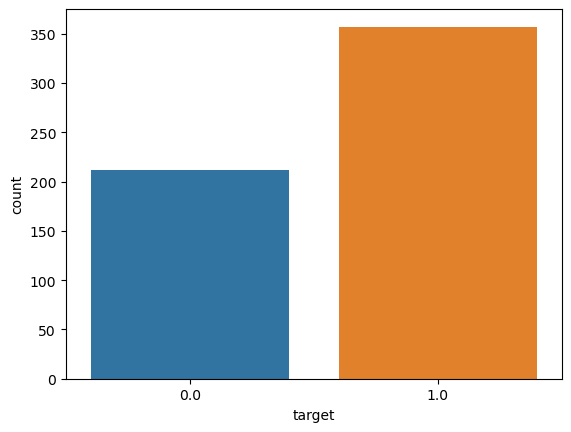

In [6]:
sns.countplot(data = df, x = 'target')

Die Features und das Klassenlabel (`target`) wurden in einem großen `Dataframe df` kombiniert. Darüber können wir nun einfach die Daten visualisieren.


# Visualisierung der Daten

## Teil 2: Verteilung eines Features plotten I

- Die Funktion [displot](https://seaborn.pydata.org/generated/seaborn.displot.html) aus `seaborn` hilft um die Verteilung des Features `mean radius` anzeigen zu lassen.  Was können wir im Schaubild erkennen? Was sagt das Feature `mean raidus` aus?

/Users/bene/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


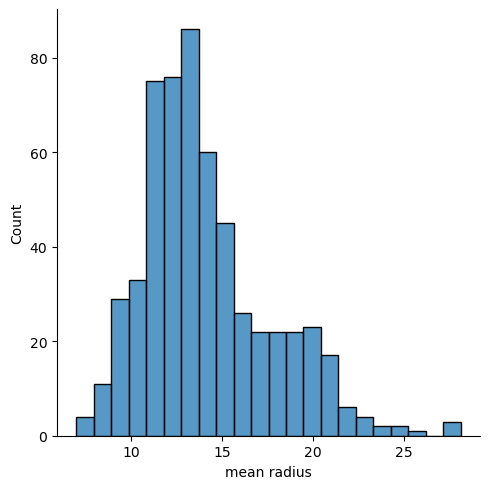

In [7]:
sns.displot(data=df, x='mean radius')
#Standardnormalverteilung -> Mittelwert ca. 14
#The higher value of the radius of the cell image indicates that the breast cancer has spread to other parts of the human body


## Teil 3:  Verteilung eines Features plotten II

- Wenn man nun den obigen Befehl nochmals ausführt, nur diesmal zusätzlich mit dem Parameter `hue="target"`, werden die zwei verschiedenen Klassen (gutartig und bösartig) visuell unterschieden. Was lässt sich jetzt aus dem Schaubild herauslesen? Bestätigt dies unsere Intuition?




/Users/bene/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


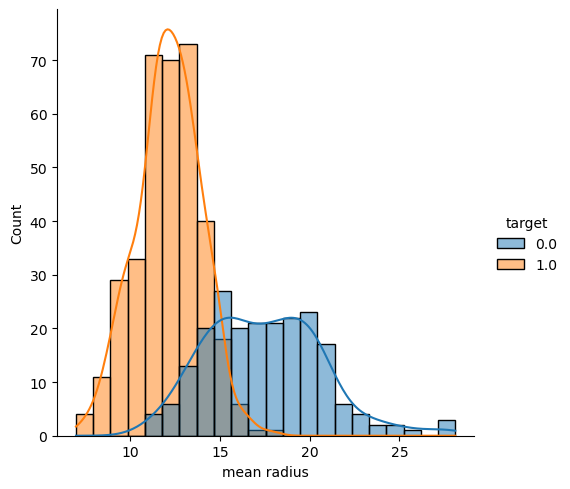

In [8]:
sns.displot(data=df, x='mean radius',hue='target',kde='true')
#je größer der mean_radius desto höher ist die Wahrscheinlichkeit einen bösartigen (target=0) Krebs zu bekommen.

## Teil 4: Zusätzliche Features plotten 

- Plots mit noch anderen Features auf die obige Art und Weise.

/Users/bene/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


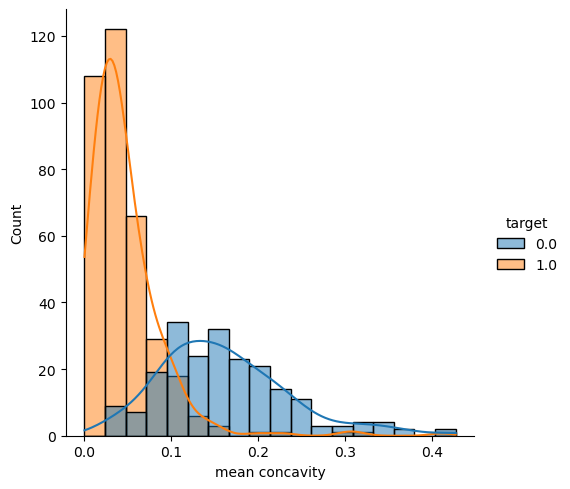

In [9]:
sns.displot(data=df, x='mean concavity',hue='target',kde='true')

/Users/bene/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


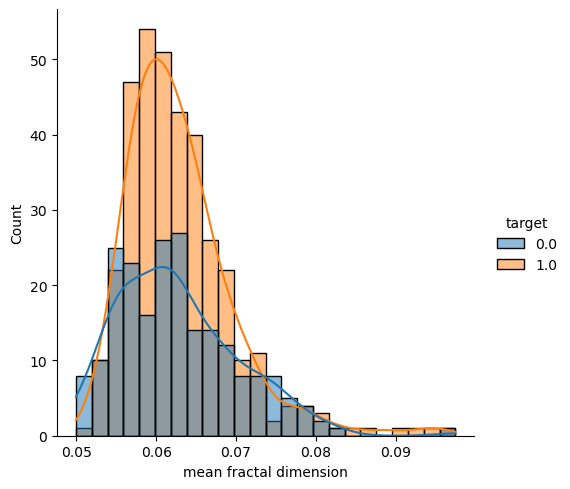

In [10]:
sns.displot(data=df, x='mean fractal dimension',hue='target',kde='true')

# Machine Learning

Wir wollen nun ein Modell auf den Daten trainieren, was geeignet ist, ausgehend von den Features Vorhersagen über die Art des Tumors treffen zu können. Dazu müssen wir die Features und Klassen in verschiedenen Variablen speichern.

## Teil 6: Daten extrahieren

- Folgende Funktion definiert ein Array `X`, welches die Datenpunkte enthält und ein Array `y` welches die Klassen enthält. Verwendet wird dafür die oben definierte Variable `dataset` oder `DataFrame`. 

In [11]:
X = df.drop('target', axis = 1)
y = df['target']
print(X.shape)
print(y.shape)

(569, 30)
(569,)


## Teil 7:  Häufigkeiten plotten

- Plots mit der Häufigkeit der verschiedenen Klassen in `y` gegeneinander. Welche Klasse kommt häufiger vor?
(Methode [`plt.hist`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html) zur Darstellung eines Histogramms.)

<function matplotlib.pyplot.show(close=None, block=None)>

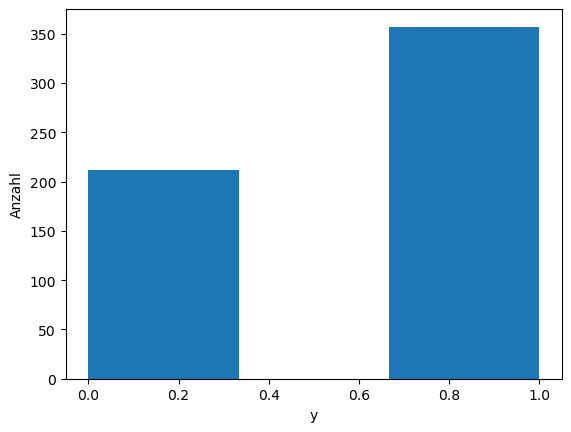

In [12]:
import matplotlib.pyplot as plt

plt.hist(y, bins=3)
plt.xlabel('y')
plt.ylabel('Anzahl')
plt.show

## Teil 8: Daten splitten

- Die Daten `X` und `y` werden in einen Trainingsdatensatz `X_train`, `y_train` und einen Testdatensatz `X_test`, `y_test` gesplittet. Das Verhältnis beträgt 80:20.

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Trainingsdatensatz Shape:{X_train.shape}")
print(f"Testdatensatz Shape:{X_test.shape}")

Trainingsdatensatz Shape:(455, 30)
Testdatensatz Shape:(114, 30)


## Teil 9: SVM trainieren

- **SVM**-Klassifikator wird mit den Trainingsdaten trainiert.

In [14]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)

SVC()

## Teil 10: Genauigkeit des Modells berechnen

- Berechnet wird die Genauigkeit (`score()`) des Modells auf den Test- und Trainingsdaten.

In [19]:
acc = clf.score(X_test, y_test)
print(f"Das Modell hat eine Genauigkeit von {acc*100:.1f} % auf den Testdaten.")

Das Modell hat eine Genauigkeit von 94.7 % auf den Testdaten.


## Teil 11: Confusion Matrix 

- Confusion Matrix für die Testdaten. Verwendet wird hierfür der Befehl `confusion_matrix` aus dem Modul `sklearn.metrics`.

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
predictions = clf.predict(X_test)
c = confusion_matrix(predictions,y_test)
c

array([[37,  0],
       [ 6, 71]])

## Teil 12: Confusion Matrix II

- Confusion Matrix auf eine schönere Weise durch die Verwendung von `sns.heatmap(...)`.

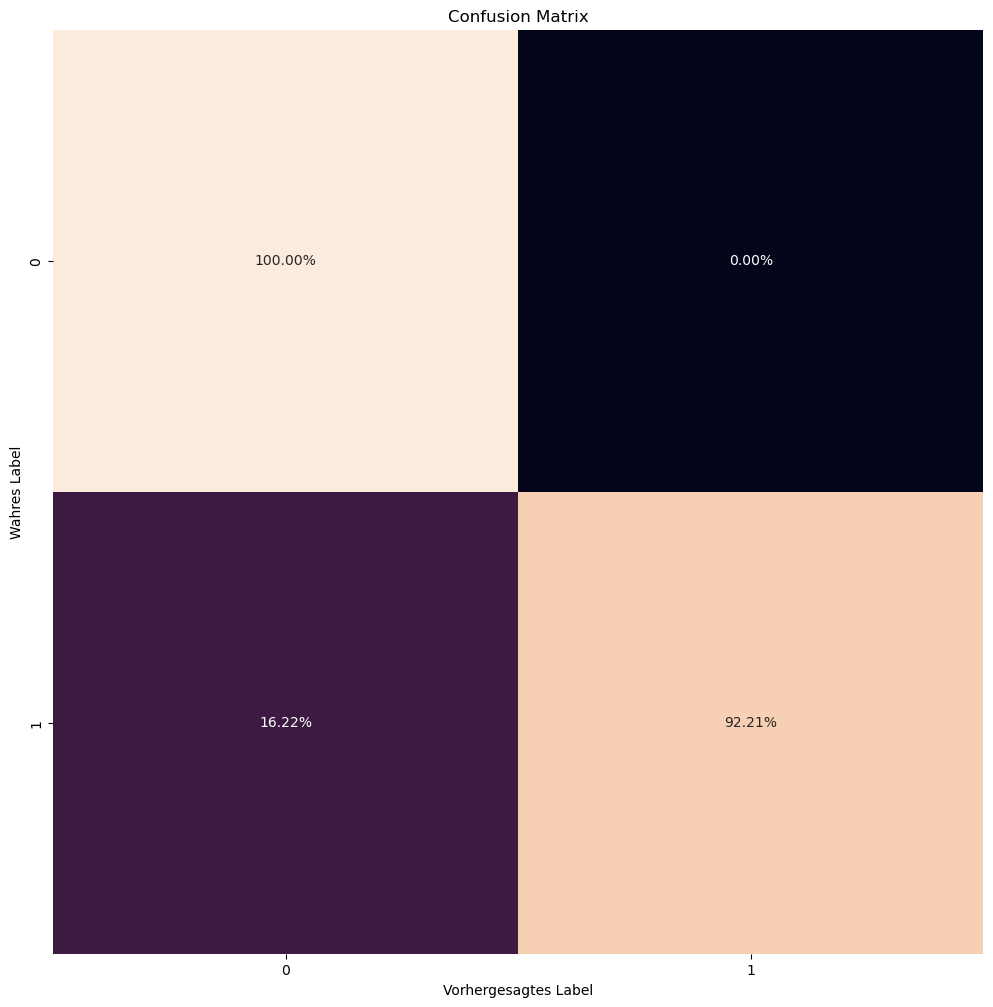

In [18]:
figure = plt.figure(figsize=(12,12))
s=sns.heatmap(c/np.sum(c,axis=1), annot=True,cbar = False,fmt=".2%")
s.set_xlabel("Vorhergesagtes Label")
s.set_ylabel("Wahres Label")
s.set_title("Confusion Matrix")
plt.show()